## tissue domains resolved with each cluster of genes identified by scGCO for layer 2

In [5]:
# import sys
# sys.path.append('../source_code/')
# from scGCO_source import *

from scGCO import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn2,venn3
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data_norm = pd.read_csv('../../Temp_files/data_norm_new/BC2_data_norm_new.csv',
                       index_col=0)
locs = Get_coord(data_norm)
print('Layers2_processing: {}'.format(data_norm.shape))

Layers2_processing: (259, 8691)


In [3]:
fileName="../../results/BreastCancer/scGCO_results/BC2_result_df.csv"
result_df=read_result_to_dataframe(fileName)

gco_df = result_df[result_df.fdr<0.05]
print("Layer2_SVgenes: {}".format( gco_df.shape))


Layer2_SVgenes: (80, 263)


## Figure 2e: Tissues structures resolved with each cluster of SV genes

[ 73. 109.  77.]


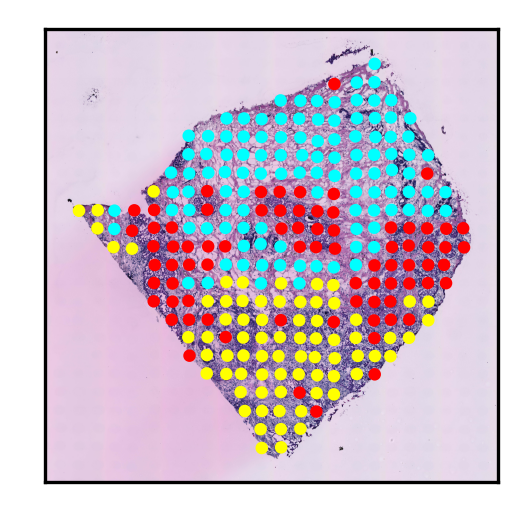

In [4]:
# create three vects for tissue structure

cluster_gene= gco_df.index
exp =  data_norm.iloc[:,1]
cellGraph = create_graph_with_weight(locs, exp) 


KMlabels,hmrf_labels=create_labels(locs,data_norm,cluster_gene,cellGraph,
                                       cluster_size=3,unary_scale_factor=100,smooth_factor=10)

uniq_tissue, count_tissue = np.unique(hmrf_labels, return_counts = True)
tissue_mat_list = list()
for tm_index in np.arange(len(uniq_tissue)):
    temp_vec = np.zeros(hmrf_labels.shape[0])
    temp_vec[np.where(hmrf_labels == uniq_tissue[tm_index])[0]] = 1       
    tissue_mat_list.append(temp_vec)
tissue_mat = np.array(tissue_mat_list)
print(np.sum(tissue_mat, axis=1))

fig,ax=plt.subplots(1,1,figsize=(2,2), dpi=300)
image='../../../data/HE-MOB-breast-cancer/HE_layer2_BC.jpg'
add_HE_image(image,ax)
colors = ["yellow","cyan","red"]

# title='Layer{}_BC_tissue_kmeans'.format(j)
title=''
subplot_HE_with_labels(locs,KMlabels,image,ax,colors,title,s=4)
ax.set_xticks([],[])
ax.set_yticks([],[])

plt.show()

In [10]:
# fig.savefig('../../results/Figure/Fig2e.pdf')

## Figure 2f: Representative graph cuts and H&E staining overlays for scGCO genes (layer 2)

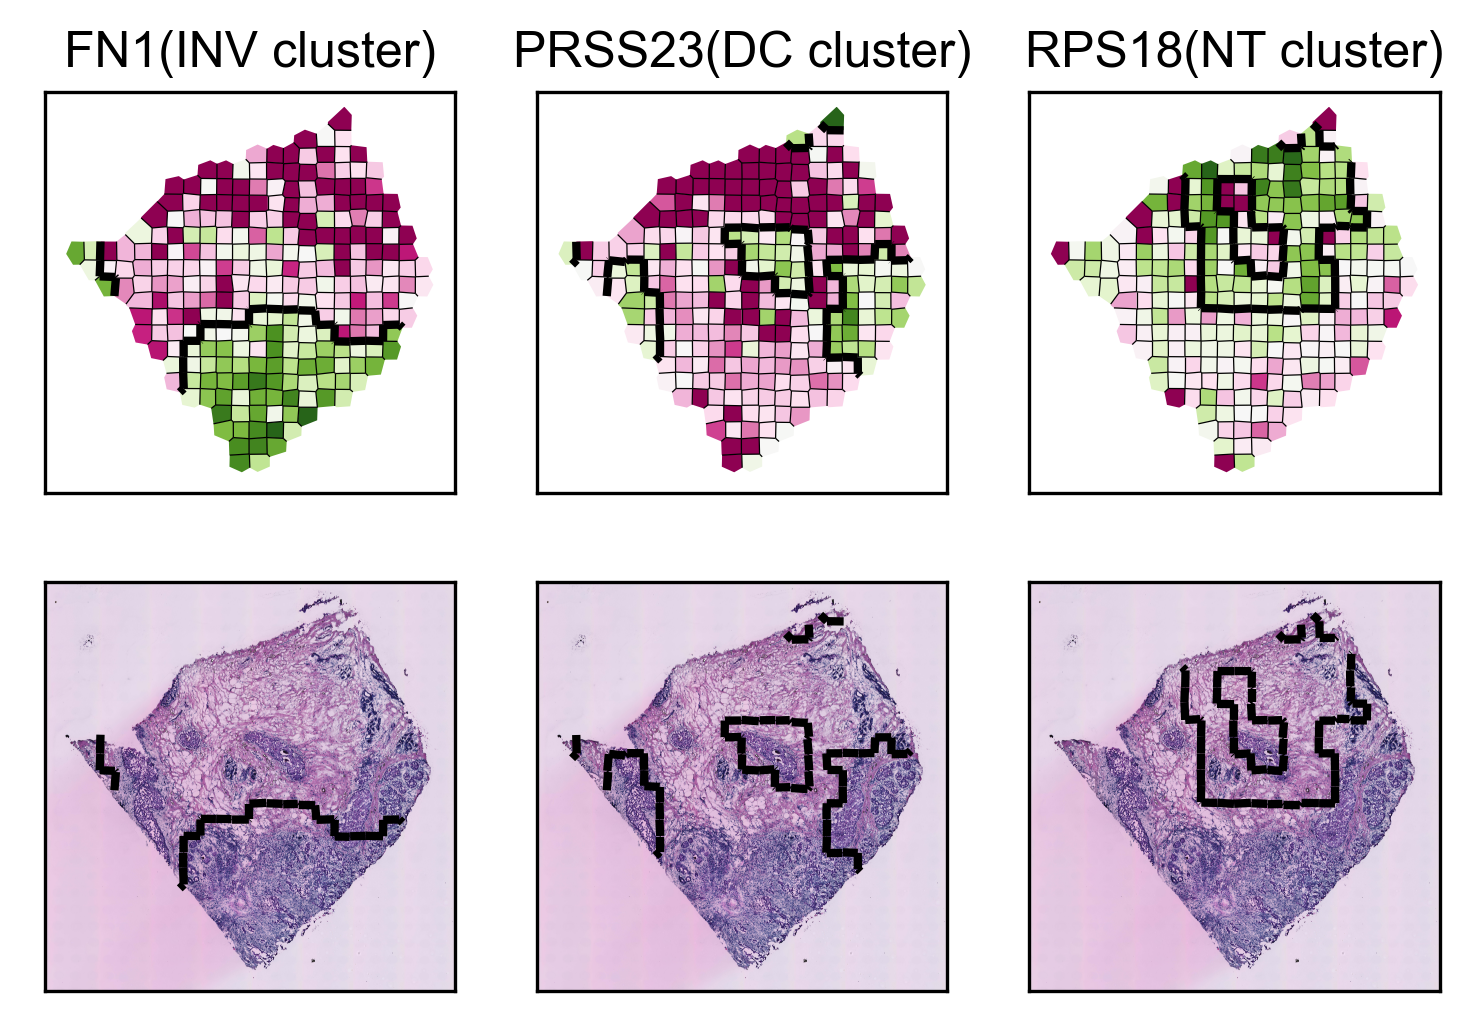

In [6]:
#TSNE 0
marker_genes=["FN1","PRSS23","RPS18"]
marker_name = ["(INV cluster)", "(DC cluster)", "(NT cluster)"]
from PIL import Image
nrow=2
ncol=3
fig,ax=plt.subplots(2, ncol,figsize=(ncol*2, nrow*2) ,dpi=300,gridspec_kw={"height_ratios":[1,1.05]})
# fig.subplots_adjust(hspace=0.3, wspace=0.3,
#                             top=0.925, right=0.925, bottom=0.075, left = 0.075)


for i,geneID in enumerate(marker_genes):
    exp=data_norm.loc[:,geneID]
    newLabels=gco_df.loc[geneID][4:].astype(int)
    p=gco_df.loc[geneID,'fdr']

    
    axes=ax[0,i]
    title= geneID+marker_name[i]
    subplot_voronoi_boundary(geneID, coord=locs, count=exp, classLabel=newLabels, p=p,ax=axes ,
                             fdr=False, point_size=0,
                          line_colors="k", class_line_width=2,
                          line_width=0.3, line_alpha=1.0,fontsize=12,set_title= title)
    axes.set_xticks([],[])
    axes.set_yticks([],[])
    
    
    axes=ax[1,i]
    image=("../../../data/HE-MOB-breast-cancer/HE_layer2_BC.jpg")
    add_HE_image(image,axes)
    subplot_boundary(geneID,locs,exp,newLabels,p,axes,
                     class_line_width=2,point_size=0,line_alpha=0,
                    set_title='')
    
    axes.set_xticks([],[])
    axes.set_yticks([],[])

plt.show()

In [12]:
# fig.savefig("../../results/Figure/Fig2f.pdf")